# Treinamento CIS - 1¬∫ Per√≠odo (Classifica√ß√£o)

## Importa√ß√£o do dataset


Importa√ß√£o das bibliotecas usadas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Importa√ß√£o do dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/adult.csv") #, sep=';'

## Conhecendo o dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Algumas colunas s√£o vari√°veis ‚Äã‚Äãcont√≠nuas. Aquelas que o dtype √© object precisam ser codificado para vari√°veis cont√≠nuas para serem utiliz√°veis.

In [ ]:
categorical_cols = ["workclass", "education", "marital.status", "occupation",
                    "relationship", "race", "sex", "native.country", "income"]

# Applying one-hot encoding while dropping the first category to avoid multicollinearity
encoded_df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display new data types after encoding
print(encoded_df.dtypes)

age                               int64
fnlwgt                            int64
education.num                     int64
capital.gain                      int64
capital.loss                      int64
                                  ...  
native.country_Trinadad&Tobago     bool
native.country_United-States       bool
native.country_Vietnam             bool
native.country_Yugoslavia          bool
income_>50K                        bool
Length: 101, dtype: object


Estas s√£o todas as novas colunas de encoded_df:

In [ ]:
column_names = encoded_df.columns.tolist()
print(column_names)


['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital.status_Married-AF-spouse', 'marital.status_Married-civ-spouse', 'marital.status_Married-spouse-absent', 'marital.status_Never-married', 'marital.status_Separated', 'marital.status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine

Como o c√≥digo acaba separando colunas para income>50k e income<=50k, transformarei novamente em uma coluna s√≥, chamada income, por√©m agora ela ser√° uma int64, n√£o object. Isso facilitar√° o desenvolvimento do projeto.

In [ ]:
# Convert boolean column to integer (0 and 1)
encoded_df["income"] = encoded_df["income_>50K"].astype(int)

# Drop the extra column (optional cleanup)
encoded_df.drop(columns=["income_>50K"], inplace=True)

# Check that the fix worked
print(encoded_df["income"].value_counts())  # Should show both 0s and 1s


income
0    24720
1     7841
Name: count, dtype: int64


De acordo com as informa√ß√µes dispon√≠veis na p√°gina do dataset no Kaggle:

**Description of fnlwgt (final weight)**: The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

* A single cell estimate of the population 16+ for each state.

* Controls for Hispanic Origin by age and sex.

* Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset dispon√≠vel em: https://www.kaggle.com/datasets/uciml/adult-census-income?resource=download

In [ ]:
with pd.option_context("float_format", "{:.4f}".format):
  display(df.describe())

age       fnlwgt  education.num  capital.gain  capital.loss  \
count 32561.0000   32561.0000     32561.0000    32561.0000    32561.0000   
mean     38.5816  189778.3665        10.0807     1077.6488       87.3038   
std      13.6404  105549.9777         2.5727     7385.2921      402.9602   
min      17.0000   12285.0000         1.0000        0.0000        0.0000   
25%      28.0000  117827.0000         9.0000        0.0000        0.0000   
50%      37.0000  178356.0000        10.0000        0.0000        0.0000   
75%      48.0000  237051.0000        12.0000        0.0000        0.0000   
max      90.0000 1484705.0000        16.0000    99999.0000     4356.0000   

       hours.per.week  
count      32561.0000  
mean          40.4375  
std           12.3474  
min            1.0000  
25%           40.0000  
50%           40.0000  
75%           45.0000  
max           99.0000

### Identificando se h√° dados ausentes

Identifica√ß√£o da quantidade de dados ausentes em cada coluna: n√£o h√° dados ausentes

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Identificando se h√° outliers

Utilizarei o m√©todo IQR para identificar outliers, a fim de preservar a integridade da an√°lise estat√≠stica, j√° que ele n√£o √© afetado por distribui√ß√µes assim√©tricas, comuns na presen√ßa de outliers.

Utilizarei as fun√ß√µes find_outliers() e summarize_outliers() para analisar cada coluna.

In [ ]:
import pandas as pd

def find_outliers(df, coluna):
    """
    Identifica a quantidade de outliers em uma coluna num√©rica de um DataFrame utilizando o m√©todo do
    intervalo interquartil (IQR).

    Par√¢metros
    ----------
    df : pandas.DataFrame
        O DataFrame contendo a coluna a ser analisada.
    coluna : str
        O nome da coluna que ser√° avaliada para detectar outliers.

    Retorno
    -------
    int or None
        Retorna o n√∫mero de outliers na coluna, ou None caso a coluna n√£o seja num√©rica.
    """
    if not pd.api.types.is_numeric_dtype(df[coluna]):
        return None  # Ignora colunas categ√≥ricas

    # C√°lculo do IQR
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)
    iqr = q3 - q1

    # Identifica√ß√£o de outliers
    outliers = df[(df[coluna] < q1 - 1.5 * iqr) | (df[coluna] > q3 + 1.5 * iqr)]
    return len(outliers)


def summarize_outliers(df, *colunas):
    """
    Gera um resumo da quantidade de outliers para colunas num√©ricas especificadas de um DataFrame.

    Par√¢metros
    ----------
    df : pandas.DataFrame
        O DataFrame contendo as colunas a serem analisadas.
    *colunas : str
        Lista de nomes das colunas cujos outliers devem ser identificados.

    Retorno
    -------
    pandas.DataFrame
        DataFrame contendo a quantidade de outliers para cada coluna analisada.
    """
    outlier_counts = {
        coluna: find_outliers(df, coluna)
        for coluna in colunas if pd.api.types.is_numeric_dtype(df[coluna])
    }
    summary_df = pd.DataFrame(list(outlier_counts.items()), columns=['Coluna', 'Quantidade de Outliers'])
    return summary_df


In [ ]:
summarize_outliers(df,"age","workclass","fnlwgt","education","education.num","marital.status","occupation","relationship","race","sex","capital.gain","capital.loss","hours.per.week","native.country","income")

Coluna  Quantidade de Outliers
0             age                     143
1          fnlwgt                     992
2   education.num                    1198
3    capital.gain                    2712
4    capital.loss                    1519
5  hours.per.week                    9008

Resultado: sim, h√° outliers nas colunas onde Dtype √© int64.

### Identificando se h√° valores 0

In [ ]:
zero_values = df == 0
zero_by_column = zero_values.sum(axis=0)
print(zero_by_column.to_frame(name="zeros_por_coluna"))

                zeros_por_coluna
age                            0
workclass                      0
fnlwgt                         0
education                      0
education.num                  0
marital.status                 0
occupation                     0
relationship                   0
race                           0
sex                            0
capital.gain               29849
capital.loss               31042
hours.per.week                 0
native.country                 0
income                         0


Resultado: sim, h√° valores 0, por√©m somente nas colunas *capital.gain* e *capital.loss*.

## Preparando os dados para a Classifica√ß√£o Bin√°ria

### Decision Tree

Usarei uma √°rvore de decis√£o para fazer a classifica√ß√£o bin√°ria porque considero que ela √© f√°cil de entender e interpretar. Ela apresenta um caminho claro de decis√µes baseadas em regras simples extra√≠das dos dados, e cada decis√£o leva a uma condi√ß√£o "sim" ou "n√£o", tornando o processo de previs√£o mais intuitivo. Al√©m disso, as √°rvores de decis√£o lidam bem com diferentes tipos de dados, requerem pouco pr√©-processamento e s√£o robustas a outliers, o que as torna uma escolha pr√°tica para muitos problemas de classifica√ß√£o.

Acur√°cia da √Årvore de Decis√£o: 0.80


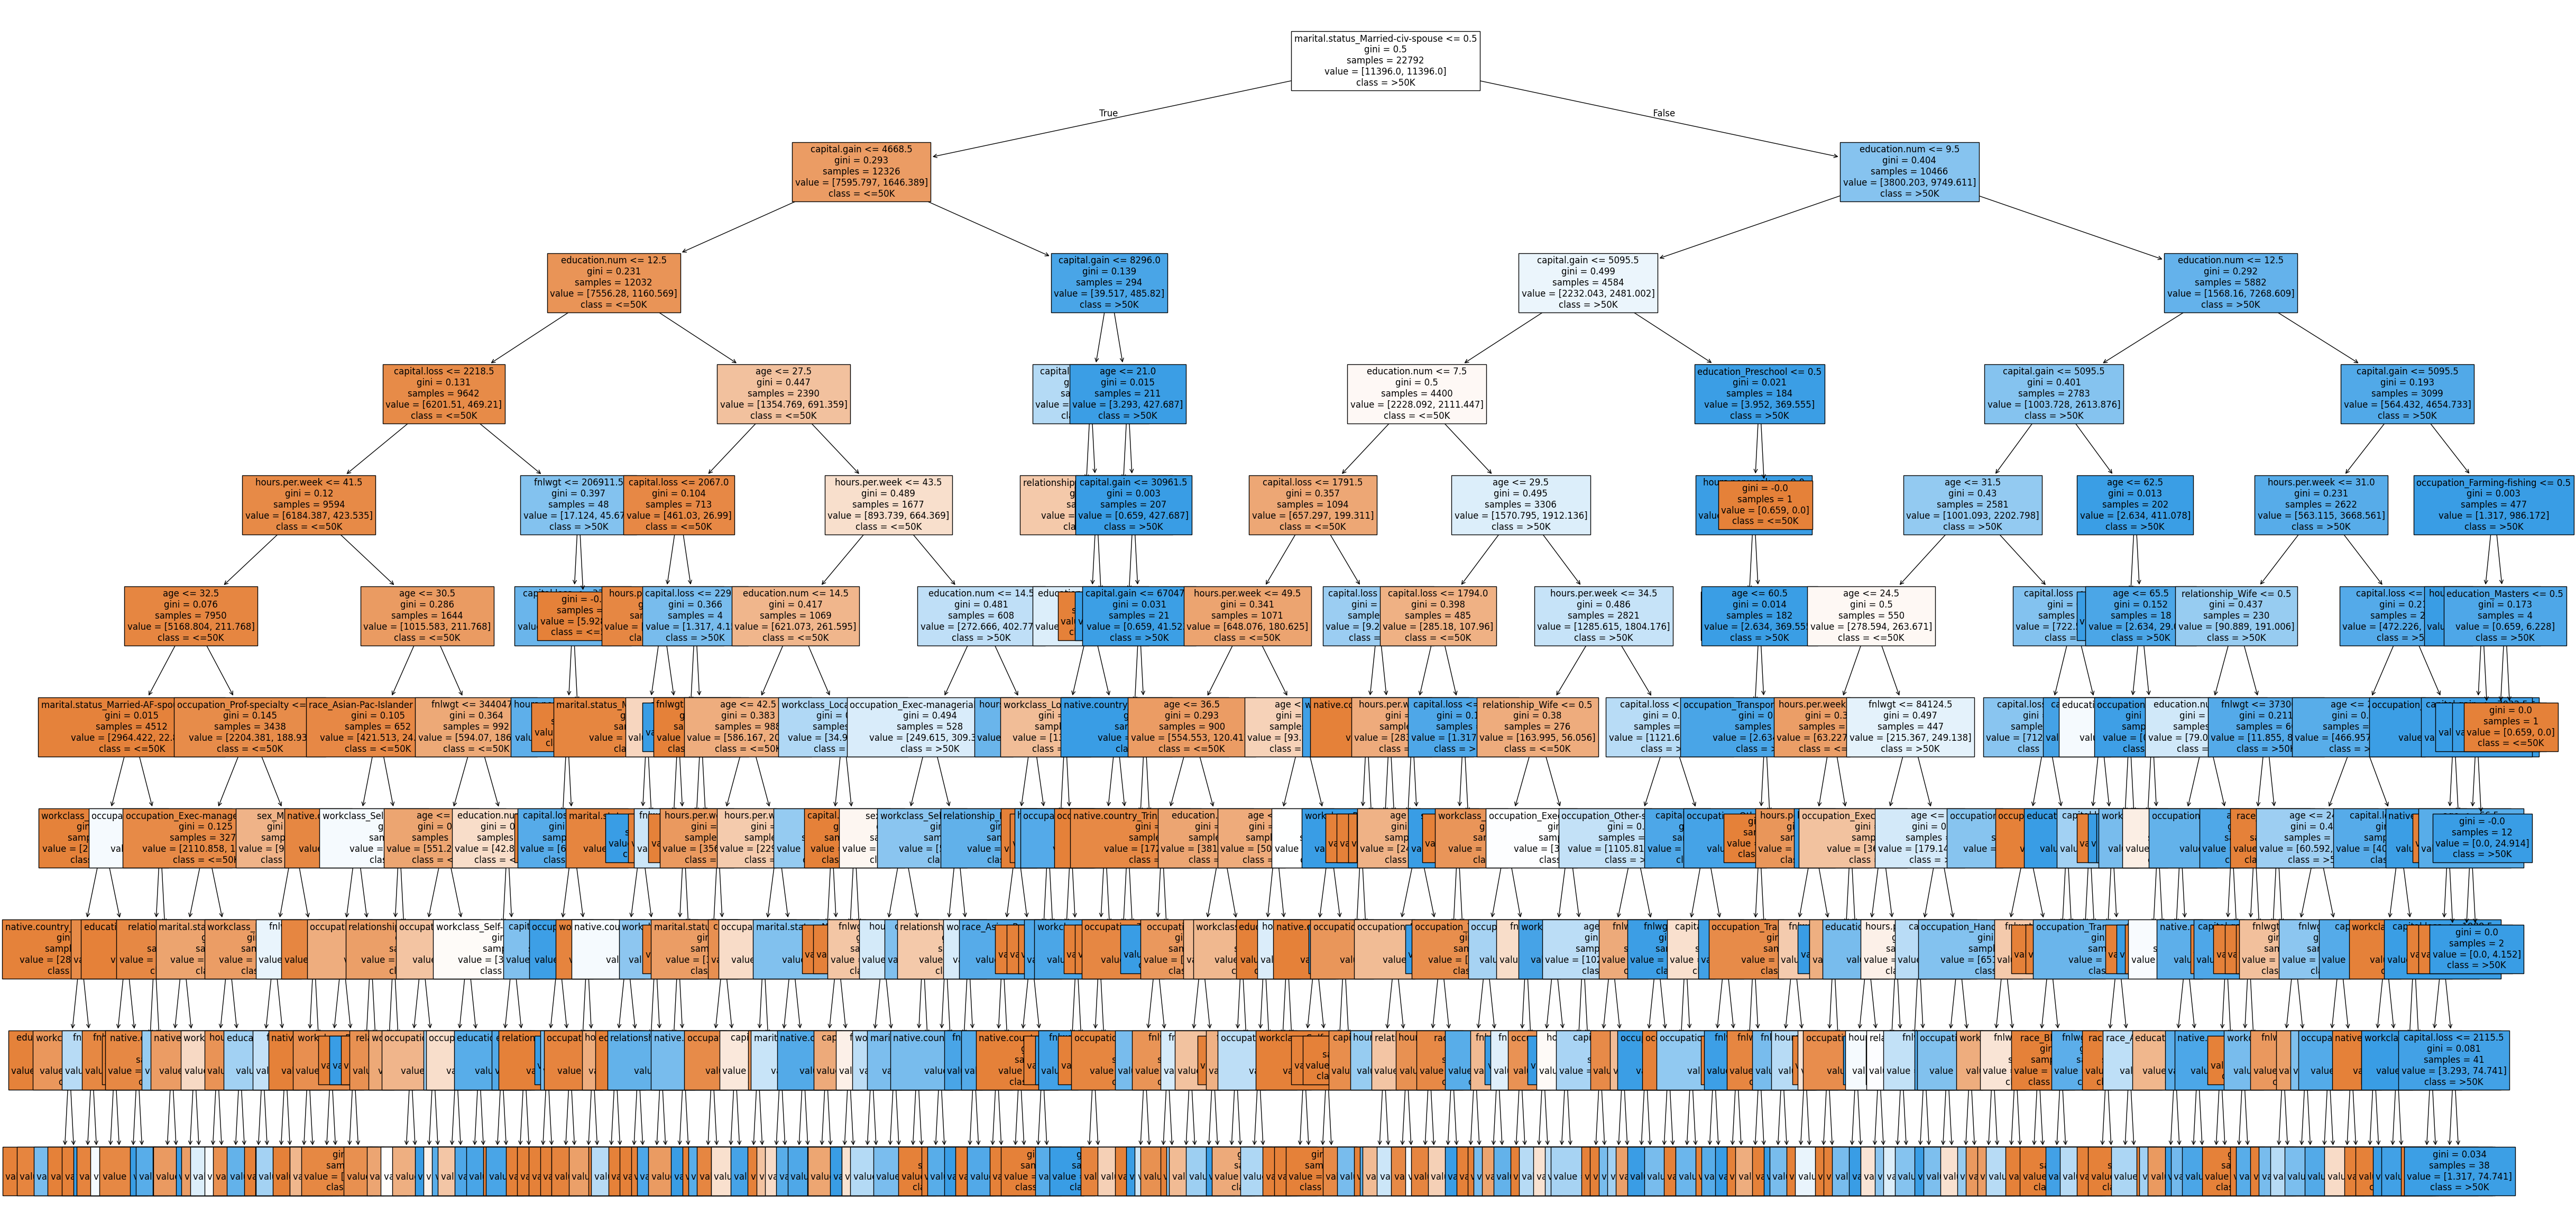

In [ ]:
# Definir features (X) e alvo (y)
X = encoded_df.drop(columns=["income"])
y = encoded_df["income"]

# Dividir os dados em treino e teste, garantindo balanceamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Criar e treinar a √°rvore de decis√£o
clf = DecisionTreeClassifier(max_depth=10, class_weight="balanced", random_state=42)

clf.fit(X_train, y_train)

# Fazer previs√µes
y_pred = clf.predict(X_test)

# Avalia√ß√£o do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acur√°cia da √Årvore de Decis√£o: {accuracy:.2f}")

# Visualizar a √°rvore de decis√£o
plt.figure(figsize=(60,30))
plot_tree(clf, feature_names=X.columns, class_names=["<=50K", ">50K"], filled=True, fontsize=12)
plt.show()


O modelo de √°rvore de decis√£o utiliza diversas vari√°veis (X) para prever a renda de um indiv√≠duo, incluindo age, occupation, education, sex, entre outras, enquanto a vari√°vel-alvo (y) cont√©m apenas a informa√ß√£o bin√°ria income, onde 0 representa <=50K e 1 representa >50K.

Para garantir um conjunto de dados balanceado, ele √© dividido em 70% para treino e 30% para teste, preservando a propor√ß√£o entre 0s e 1s atrav√©s do par√¢metro stratify=y, e mantendo a reprodutibilidade com random_state=42.

O modelo ent√£o cria uma √°rvore de decis√£o com profundidade m√°xima de 10 (max_depth=10), permitindo mais divis√µes nos dados, e aplica class_weight="balanced" para corrigir o desbalanceamento, evitando que a classe income = 1 seja subrepresentada.

Ap√≥s o treinamento (fit()), o algoritmo aprende regras de decis√£o para separar income = 0 de income = 1, utilizando essas regras para prever a classifica√ß√£o bin√°ria dos exemplos de teste. As previs√µes (y_pred) s√£o comparadas com os valores reais (y_test) e a acur√°cia do modelo √© calculada, sendo 80% neste caso, indicando que o modelo acertou 80% das previs√µes.

Finalmente, uma representa√ß√£o gr√°fica da √°rvore √© gerada, mostrando crit√©rios de decis√£o como "education > 12?" ou "capital.gain > 5000?", onde cada n√≥ da √°rvore divide os dados at√© alcan√ßar a classifica√ß√£o bin√°ria final de income = 0 ou income = 1.

### Random Forest

Tamb√©m farei um Random Forest para fazer a classifica√ß√£o bin√°ria a fins de compara√ß√£o com a Decision Tree.

Este m√©todo combina m√∫ltiplas √°rvores de decis√£o, o que reduz o risco de overfitting e melhora as previs√µes, especialmente em conjuntos de dados grandes e complexos.

In [ ]:
# Initialize the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight="balanced")

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acur√°cia do Random Forest: {accuracy_rf:.2f}")


Acur√°cia do Random Forest: 0.79


Este c√≥digo implementa um modelo de Random Forest para classifica√ß√£o bin√°ria (income = 0 ou income = 1), utilizando um conjunto de √°rvores de decis√£o para melhorar a precis√£o e reduzir overfitting, combinando previs√µes de m√∫ltiplas √°rvores para obter um resultado mais est√°vel e confi√°vel.

Ele define 100 √°rvores (n_estimators=100) para garantir robustez, limita a profundidade m√°xima das √°rvores em 10 n√≠veis (max_depth=10) para evitar overfitting e aplica class_weight="balanced" para tratar o desbalanceamento entre as classes. Al√©m disso, fixa random_state=42 para garantir que os resultados sejam reprodut√≠veis.

Durante o treinamento (X_train, y_train), cada √°rvore aprende padr√µes com base em subconjuntos aleat√≥rios dos dados, aumentando a generaliza√ß√£o do modelo. Ap√≥s o treino, o modelo utiliza as regras aprendidas para prever income = 0 ou income = 1 em novos exemplos de teste (X_test).

As previs√µes (y_pred_rf) s√£o comparadas com os valores reais (y_test) para calcular a taxa de acerto do modelo, exibindo sua acur√°cia e mostrando quantos exemplos foram classificados corretamente. Esse processo garante que o Random Forest reduza overfitting, aprimore precis√£o ao combinar v√°rias decis√µes em uma √∫nica previs√£o final e determine a import√¢ncia dos atributos, permitindo identificar quais vari√°veis influenciam mais a previs√£o de renda.

### Comparando os dois m√©todos

In [ ]:
# Predictions
y_pred_dt = clf.predict(X_test)  # Decision Tree Predictions
y_pred_rf = rf_clf.predict(X_test)  # Random Forest Predictions

# Metrics Function
def evaluate_model(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"üîπ {model_name}:")
    print(f"   Accuracy: {accuracy:.2f}")
    print(f"   Precision: {precision:.2f}")
    print(f"   Recall: {recall:.2f}")
    print(f"   F1-score: {f1:.2f}\n")

# Evaluate both models
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)


üîπ Decision Tree:
   Accuracy: 0.80
   Precision: 0.55
   Recall: 0.85
   F1-score: 0.67

üîπ Random Forest:
   Accuracy: 0.79
   Precision: 0.54
   Recall: 0.88
   F1-score: 0.67



Comparando os modelos √Årvore de Decis√£o e Random Forest, temos que a √Årvore de Decis√£o apresentou 80% de acur√°cia, ligeiramente superior ao 79% do Random Forest, indicando que ambos classificam corretamente a maioria dos casos.

No entanto, a precis√£o foi moderada em ambos os modelos (0.55 para √Årvore de Decis√£o e 0.54 para Random Forest), sugerindo que ainda h√° falsos positivos.

O recall foi maior no Random Forest (0.88) do que na √Årvore de Decis√£o (0.85), o que significa que o Random Forest identifica melhor os casos >50K, minimizando falsos negativos.

O F1-score foi igual para ambos (0.67), equilibrando precis√£o e recall, mas evidenciando necessidade de ajustes para melhorar a precis√£o.

Dessa forma, se o objetivo for maximizar recall, evitando que casos >50K sejam perdidos, o Random Forest √© a melhor escolha. No entanto, se o objetivo √© um modelo mais simples e r√°pido, a √Årvore de Decis√£o j√° oferece um desempenho s√≥lido.

#### Matriz de Confus√£o

A matriz de confus√£o serve para avaliar a performance dos modelos √Årvore de Decis√£o e Random Forest, identificando acertos e erros (Verdadeiros Positivos, Verdadeiros Negativos, Falsos Positivos e Falsos Negativos) nas previs√µes de renda (<=50K ou >50K).

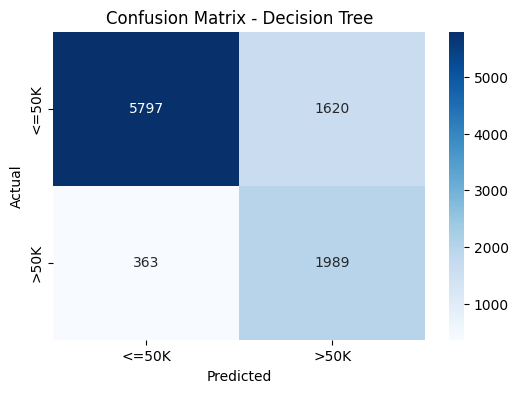

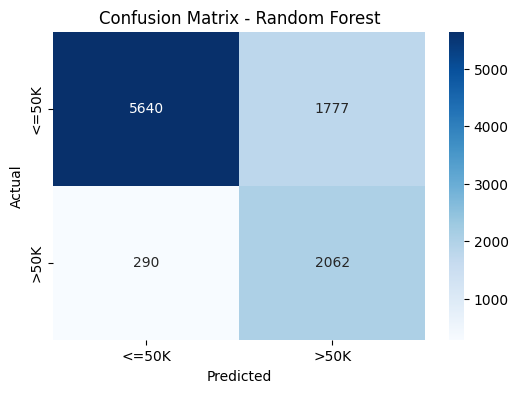

In [ ]:
# Function for plotting confusion matrix
def plot_confusion_matrix(model_name, y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot matrices for both models
plot_confusion_matrix("Decision Tree", y_test, y_pred_dt)
plot_confusion_matrix("Random Forest", y_test, y_pred_rf)



A √Årvore de Decis√£o apresentou 5478 acertos para <=50K e 2071 para >50K, mas teve 1939 falsos positivos (casos <=50K classificados erroneamente como >50K) e 281 falsos negativos.

J√° o Random Forest acertou 5640 casos <=50K e 2062 >50K, apresentando menos falsos positivos (1777), mas um n√∫mero ligeiramente maior de falsos negativos (290).

Comparando os dois modelos, o Random Forest mostrou melhor desempenho ao evitar falsos positivos, sendo mais preciso na classifica√ß√£o de <=50K, enquanto a √Årvore de Decis√£o teve um recall um pouco melhor, identificando mais casos reais de >50K.

Assim, se a prioridade for reduzir falsos positivos, o Random Forest √© a melhor op√ß√£o, mas se o foco for maximizar a captura de >50K, a √Årvore de Decis√£o pode ser mais adequada.

#### Gr√°fico de import√¢ncia de atributos

Para visualizar e compreender quais caracter√≠sticas do conjunto de dados t√™m maior impacto na previs√£o ou decis√£o do modelo, ou seja, identificar quais atributos s√£o mais influentes e interpretar os resultados de forma mais informada, faremos tamb√©m um Gr√°fico de Import√¢ncia de Atributos.

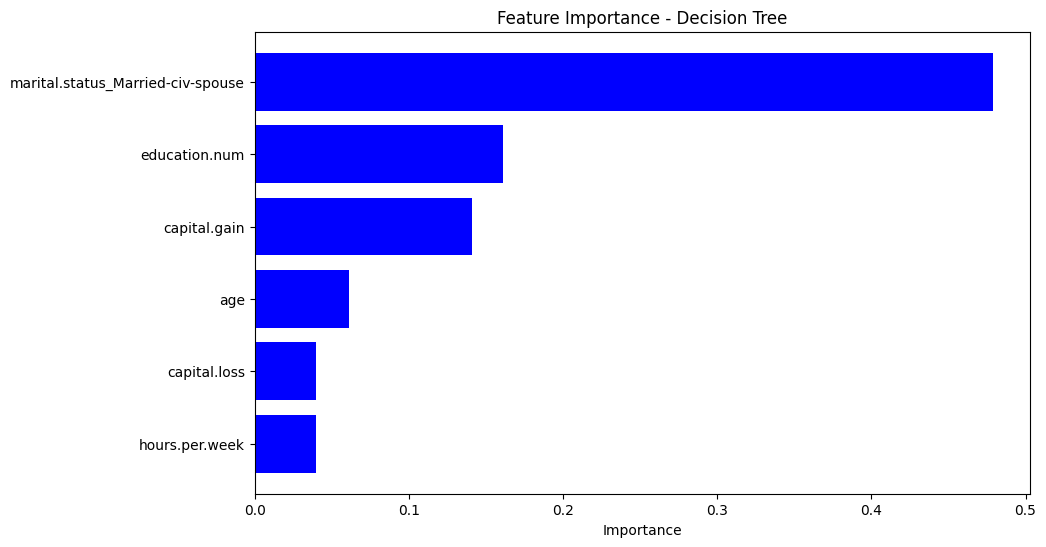

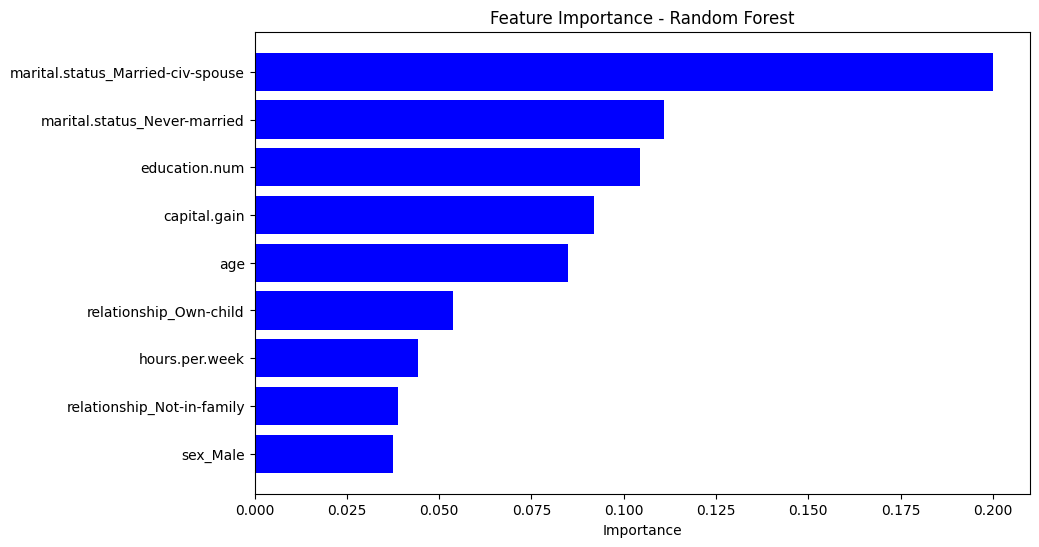

In [ ]:
# Feature importance plot (only values > 0)
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    sorted_idx = importances.argsort()[::-1]  # Sort importance

    # Filter features with importance greater than 0.025
    valid_indices = sorted_idx[importances[sorted_idx] > 0.025]

    plt.figure(figsize=(10,6))
    plt.barh(X.columns[valid_indices], importances[valid_indices], color="blue")
    plt.xlabel("Importance")
    plt.title(f"Feature Importance - {model_name}")
    plt.gca().invert_yaxis()
    plt.show()

# Plot for both models
plot_feature_importance(clf, "Decision Tree")
plot_feature_importance(rf_clf, "Random Forest")


Para ambos os modelos, √°rvore de decis√£o e Random Forest, o atributo marital.status_Married-civ-spouse √© o mais influente na previs√£o da renda, sugerindo que ser casado com c√¥njuge civil √© um indicador chave.

O education.num e capital.gain tamb√©m s√£o importantes, indicando o papel significativo da educa√ß√£o e de ganhos financeiros adicionais na previs√£o de renda.

Enquanto a √°rvore de decis√£o considera menos atributos, o Random Forest incorpora um maior n√∫mero de caracter√≠sticas, como marital.status_Never-married, age, relationship_Own-child, hours.per.week, entre outros, tornando-o mais abrangente na an√°lise.